In [13]:
import math
import matplotlib.pyplot as plt

def area_comparison(self, other, operator):
    if hasattr(self, 'area') and hasattr(other, 'area'): 
        return 1 if eval(f'self.area {operator} other.area') else 0
    else:
        raise AttributeError('Superclass GeometricShape has no attribute "area", only its subclasses')



class GeometricShape:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def translate(self, x, y):
        try:
            self.draw()
            translate_axis = [min(x, self.x) - self.dist_from_center - 5, 
                            max(x, self.x) + self.dist_from_center + 5, 
                            min(y, self.y) - self.dist_from_center - 2.5, 
                            max(y, self.y) + self.dist_from_center + 2.5]
            self.x = x
            self.y = y
            self.draw(translate_axis)
        except ValueError:
            ('x and y must be numeric')

    def __str__(self):
        return f'GeometricShape centered at x: {self.x}, y: {self.y}'
    
    def __repr__(self):
        return f'GeometricShape({self.x}, {self.y})'
    
    def __eq__(self, other):
        return area_comparison(self, other, '==')

    def __lt__(self, other):
        return area_comparison(self, other, '<')

    def __gt__(self, other):
        return area_comparison(self, other, '>')

    def __le__(self, other):
        return area_comparison(self, other, '<=')

    def __ge__(self, other):
        return area_comparison(self, other, '>=')
    
    def set_axis_for_plot(self, axis):
        plt.axis(axis) if axis else plt.axis([self.x - self.dist_from_center - 5, 
                                              self.x + self.dist_from_center + 5, 
                                              self.y - self.dist_from_center - 2.5, 
                                              self.y + self.dist_from_center + 2.5])



class Circle(GeometricShape):
    def __init__(self, x, y, radius):
        super().__init__(x, y)
        self.radius = radius
        self.area = math.pi * radius ** 2
        self.circumference = 2 * math.pi * radius
        self.dist_from_center = radius

    def __str__(self):
        return f'Circle centered at x: {self.x}, y: {self.y} and radius: {self.radius}'
    
    def __repr__(self):
        return f'Circle({self.x}, {self.y}, {self.radius})'

    def is_unit_circle(self):
        return True if self.radius == 1 and self.x == 0 and self.y == 0 else False

    def draw(self, axis=[]):
        self.set_axis_for_plot(axis)

        circle = plt.Circle((self.x, self.y), self.radius, fill=False)
        
        plt.gca().add_patch(circle)

    def is_inside(self, point):
        euclidean_dist = math.sqrt((point[0] - self.x) ** 2 + (point[1] - self.y) ** 2)
        return True if euclidean_dist <= self.radius else False


class Rectangle(GeometricShape):
    def __init__(self, x, y, side1, side2):
        super().__init__(x, y)
        self.side1 = side1
        self.side2 = side2
        self.area = side1 * side2
        self.circumference = 2 * side1 + 2 * side2
        self.dist_from_center = math.sqrt(self.side1 ** 2 + self.side2 ** 2)

    def __str__(self):
        return f'Rectangle centered at x: {self.x}, y: {self.y} and side1: {self.side1}, side2: {self.side2}'
    
    def __repr__(self):
        return f'Rectangle({self.x}, {self.y}, {self.side1}, {self.side2})'

    def is_square(self):
        return True if self.side1 == self.side2 else False
    
    def draw(self, axis=[]):
        self.set_axis_for_plot(axis)

        rectangle = plt.Rectangle((self.x - self.side1 / 2, self.y - self.side2 / 2), self.side1, self.side2, fill=False)
        
        plt.gca().add_patch(rectangle)

    def is_inside(self, point):
        return True if self.x - self.side1 / 2 <= point[0] <= self.x + self.side1 / 2 and self.y - self.side2 / 2 <= point[1] <= self.y + self.side2 / 2 else False


True

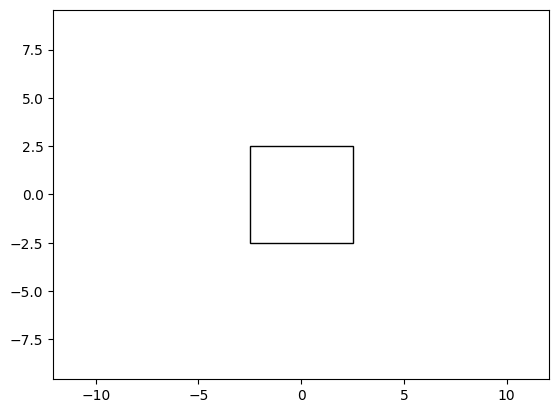

In [14]:
rect1 = Rectangle(0, 0, 5, 5)

rect1.draw()

rect1.is_inside((-2, 2))



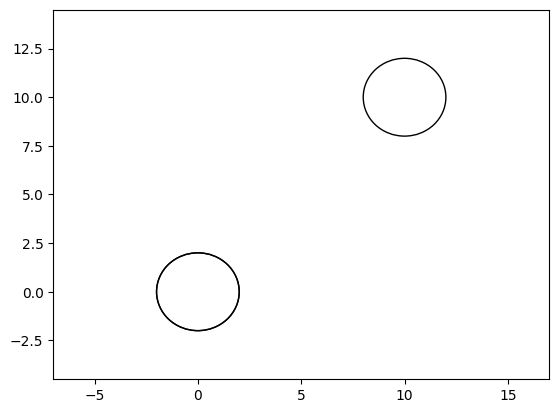

In [15]:
c1 = Circle(0, 0, 2)
c1.draw()
c1.translate(10, 10)


In [16]:


c1 = Circle(3, 4, 2)
print(c1)
c1

r1 = Rectangle(5, 6, 3, 1)
print(r1)
r1

fig1 = GeometricShape(1, 2)
print(fig1)
fig1

Circle centered at x: 3, y: 4 and radius: 2
Rectangle centered at x: 5, y: 6 and side1: 3, side2: 1
GeometricShape centered at x: 1, y: 2


GeometricShape(1, 2)

TypeError: '<' not supported between instances of 'int' and 'str'

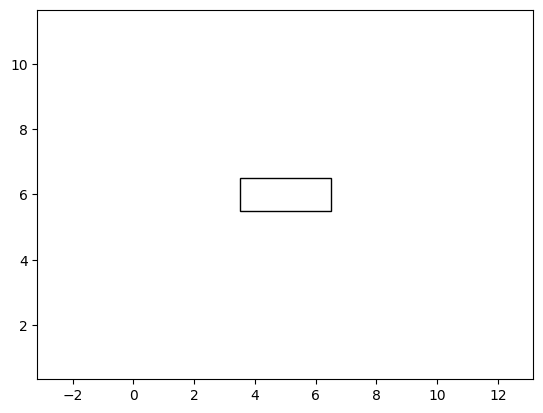

In [17]:
r1.translate("TRE", 5)